# Семинар 6. Собственные векторы и собственные значения

## Cвязь спектрального разложения и сингулярного разложения

## Свойства собственных векторов

- Симметричная и положительно определённая матрица
- Детерминант и след

## Анализ сходимости степенного метода

- Симметричная положительно определённая матрица
- Симметричная матрица
- Несимметричная матрица

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теоретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [1]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [15]:
np.random.seed(0)
n = 5000
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[3.33579973e-06 2.24180226e-04 2.45518269e-03 ... 1.98539800e+04
 1.99035747e+04 2.00337960e+04]
[[ 0.00693512  0.00878385 -0.00132974 ...  0.002824   -0.02600186
  -0.01557483]
 [-0.00742241  0.00021248  0.00240108 ...  0.01042209 -0.01489006
   0.00664014]
 [ 0.00775254 -0.00333144  0.01669732 ...  0.00032354 -0.00359474
   0.01874593]
 ...
 [ 0.00582463 -0.01746367 -0.00484859 ... -0.01684202  0.00900489
   0.00896095]
 [ 0.00590457  0.00760009 -0.0030163  ...  0.02603461  0.00709923
   0.01214542]
 [ 0.00288786 -0.00967039 -0.02369307 ... -0.02637732 -0.00941134
   0.00432588]]


In [17]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.01620287 -0.00636943 -0.01864437 ... -0.00915387 -0.01247088
 -0.00398095]
20033.726744687774


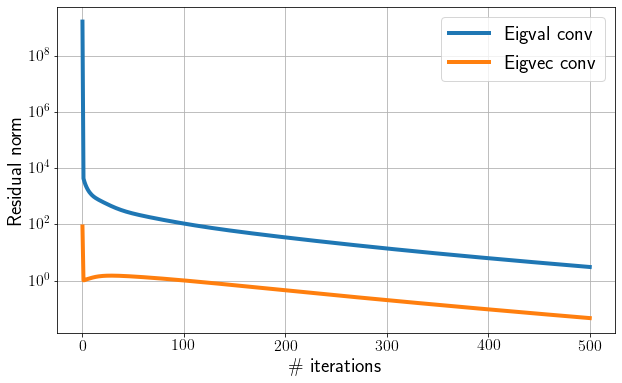

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [19]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[2.59797976e-06 7.50164507e-01 7.91999974e-01 8.24804664e-01
 8.49239605e-01 8.68905308e-01 8.85643151e-01 9.00204521e-01
 9.12822328e-01 9.23541157e-01 9.32398392e-01 9.39499430e-01
 9.45024652e-01 9.49203891e-01 9.52284019e-01 9.54502787e-01
 9.56072697e-01 9.57173741e-01 9.57952291e-01 9.58523520e-01
 9.58975449e-01 9.59373430e-01 9.59764424e-01 9.60180774e-01
 9.60643388e-01 9.61164362e-01 9.61749081e-01 9.62397914e-01
 9.63107548e-01 9.63872064e-01 9.64683779e-01 9.65533926e-01
 9.66413190e-01 9.67312140e-01 9.68221558e-01 9.69132706e-01
 9.70037511e-01 9.70928705e-01 9.71799911e-01 9.72645685e-01
 9.73461526e-01 9.74243854e-01 9.74989965e-01 9.75697969e-01
 9.76366714e-01 9.76995707e-01 9.77585024e-01 9.78135227e-01
 9.78647280e-01 9.79122472e-01 9.79562343e-01 9.79968623e-01
 9.80343172e-01 9.80687930e-01 9.81004880e-01 9.81296006e-01
 9.81563269e-01 9.81808583e-01 9.82033799e-01 9.82240687e-01
 9.82430931e-01 9.82606124e-01 9.82767757e-01 9.82917225e-01
 9.83055825e-01 9.831847

### Симметричная матрица

- Cобственные значений вещественные

In [23]:
n = 5
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[-5.44936672 -2.28451328  0.26082577  2.71492494  3.09445749]
[[ 0.14442619  0.06292326 -0.03222725 -0.03691706 -0.98629624]
 [-0.49873446 -0.73811199 -0.41725057  0.14094567 -0.11176276]
 [-0.7292717   0.39062475  0.00847571 -0.55834768 -0.06124645]
 [-0.34973306  0.47599608 -0.14397777  0.79264521 -0.04580927]
 [ 0.27614235  0.26846115 -0.89669501 -0.19680673  0.09422948]]


In [24]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.14442611  0.49873446  0.7292717   0.34973307 -0.27614235]
-5.4493667206144805


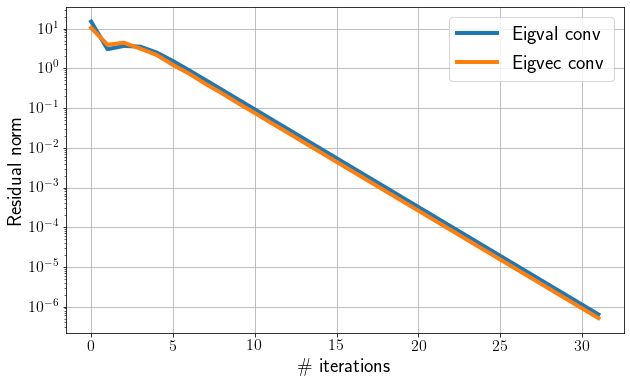

In [25]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [27]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals)
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.20182855 1.20721715 0.96084509 0.71157896 0.61049303 0.5795533
 0.57070341 0.56828358 0.56769876 0.56761529 0.56765091 0.56770174
 0.56774384 0.56777475 0.56779674 0.56781237 0.56782358 0.56783173
 0.56783773 0.5678422  0.56784556 0.5678481  0.56785003 0.5678515
 0.56785263 0.56785349 0.56785415 0.56785466 0.56785505 0.56785535
 0.56785558]
[0.37457121 1.12325822 0.71206484 0.69195769 0.56164013 0.59714023
 0.55384027 0.58030023 0.55915799 0.57427313 0.56297182 0.57128877
 0.56515277 0.56969894 0.56635897 0.56884122 0.567023   0.56837845
 0.56738912 0.56812963 0.56759173 0.56799661 0.56770447 0.56792611
 0.56776769 0.56788922 0.56780351 0.5678703  0.56782407 0.5678609
 0.56783608]
[0.26082577 2.28451328 2.71492494 3.09445749 5.44936672]
0.5678563493034563


## Несимметричная матрица

In [42]:
n = 5
A = np.random.randn(n, n)

true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[-0.90737416+1.17675964j -0.90737416-1.17675964j  1.39962848+1.1001903j
  1.39962848-1.1001903j   0.7643864 +0.j        ]
[0.7643864  1.48596471 1.48596471 1.78027486 1.78027486]
[[-0.13990689-0.29697184j -0.13990689+0.29697184j  0.75722537+0.j
   0.75722537-0.j         -0.60139301+0.j        ]
 [-0.13093411+0.45541678j -0.13093411-0.45541678j  0.02013002-0.30992388j
   0.02013002+0.30992388j  0.61184784+0.j        ]
 [-0.2003651 +0.43498031j -0.2003651 -0.43498031j -0.12196027-0.43477681j
  -0.12196027+0.43477681j  0.08653551+0.j        ]
 [ 0.49710198+0.j          0.49710198-0.j         -0.1818767 +0.05462176j
  -0.1818767 -0.05462176j -0.05696893+0.j        ]
 [-0.0308515 +0.43619877j -0.0308515 -0.43619877j  0.12609069+0.27255274j
   0.12609069-0.27255274j -0.50322442+0.j        ]]


In [43]:
x0 = np.random.randn(n) #+ 1j * np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.91155293 -0.25728212 -0.18011694  0.26001761  0.05315916]
1.0562180934730439


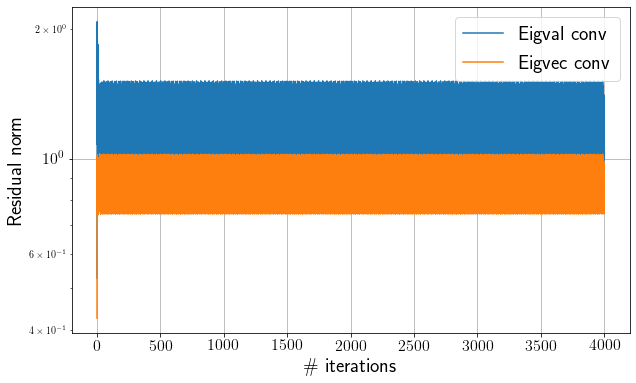

In [44]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [45]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[3.3499216  1.175321   0.72829979 ... 0.67106007 0.8839975  1.30887881]
[2.35676505 1.01458248 0.96576614 ... 0.81918256 0.94021141 1.14406242]
1.0


### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

## Степенной метод для максимального сингулярного числа

In [46]:
def max_singular_value(A, x0, max_iter, eps):
    x = x0.copy()
    conv_x = []
    conv_y = []
    for i in range(max_iter):
        y = A @ x
        y = y / np.linalg.norm(y)
        conv_y.append(y.copy())
        x = A.T @ y
        x = x / np.linalg.norm(x)
        conv_x.append(x.copy())
        singval = y @ (A @ x)
        res = A @ x - singval * y
        if np.linalg.norm(res) < eps:
            break
    return x, y, singval, conv_x, conv_y

In [52]:
m = 100
n = 10
max_iter = 20000
A = np.random.randn(m, n)
x0 = np.random.randn(n)
u, v, sigma, conv_x, conv_y = max_singular_value(A, x0, max_iter, 1e-4)
U, s, V = np.linalg.svd(A, full_matrices=False)

max_eigvec, max_eigval, conv = power_method(A.T @ A, x0, max_iter, 1e-4)

In [53]:
print(sigma)
print(s[0])
print(np.sqrt(max_eigval))

12.203034713743538
12.20303471976665
12.203034719725574


In [54]:
print(np.sqrt(power_method_singval_conv[1:] / power_method_singval_conv[:-1]))
print(s[1] / s[0])

[0.83994723 0.81889681 0.87487708 0.92829747 0.94964797 0.95462736
 0.95417352 0.95205579 0.94945669 0.94681839 0.94436391 0.94222326
 0.94046432 0.93910818 0.93814407 0.93754295 0.93726817 0.93728234
 0.93755127 0.93804553 0.93874066 0.93961648 0.94065597 0.94184405
 0.94316631 0.94460796 0.946153   0.94778364 0.94948019 0.95122119
 0.95298399 0.95474547 0.95648307 0.95817568 0.95980457 0.96135406
 0.96281198 0.96416976 0.96542241 0.96656813 0.96760791 0.96854498
 0.96938427 0.97013191 0.97079476 0.97138004 0.97189501 0.97234677
 0.97274208 0.97308728 0.97338818 0.9736501  0.97387783 0.97407564
 0.97424733 0.97439629 0.97452545 0.97463741 0.97473446 0.97481855
 0.97489142 0.97495457 0.97500928 0.9750567  0.9750978  0.97513342
 0.9751643  0.97519107 0.97521428 0.97523441 0.97525187 0.97526702
 0.97528016 0.97529156 0.97530145 0.97531003 0.97531749 0.97532395
 0.97532957 0.97533444 0.97533867 0.97534235 0.97534554 0.97534831
 0.97535071 0.9753528  0.97535461 0.97535619 0.97535755 0.9753

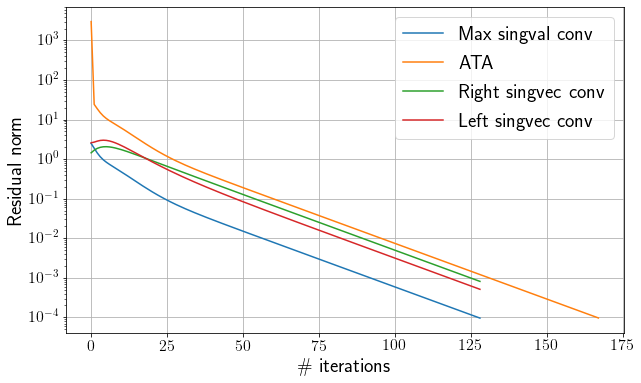

In [55]:
power_method_singval_conv = np.array([np.linalg.norm(A @ x - y @ (A @ x) * y) for x, y in zip(conv_x, conv_y)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_singval_conv, label="Max singval conv")

plt.plot(np.array([np.linalg.norm(A.T @ A @ x - x @ (A.T @ A @ x) * x) for x in conv]), label="ATA")

power_method_rightsingvec_conv = np.array([np.linalg.norm(x - x[0] / V[0, 0] * V[0, :].ravel()) for x in conv_x])
plt.plot(power_method_rightsingvec_conv, label="Right singvec conv")

power_method_leftsingvec_conv = np.array([np.linalg.norm(y - y[0] / U[0, 0] * U[:, 0]) for y in conv_y])
plt.plot(power_method_leftsingvec_conv, label="Left singvec conv")

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)